In [ ]:
#https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

In [ ]:
# define the 3072-1024-512-10 architecture using Keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
from tensorflow.keras.regularizers import l1, l2, l1_l2

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
adam=Adam(0.001)
model.compile(loss="categorical_crossentropy", optimizer=adam,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=10, batch_size=32)

[INFO] training network...
Epoch 1/10
1563/1563 [==============================] - 100s 63ms/step - loss: 1.9793 - accuracy: 0.2741 - val_loss: 1.8155 - val_accuracy: 0.3450
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.8515 - accuracy: 0.3235 - val_loss: 1.7559 - val_accuracy: 0.3786
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.7967 - accuracy: 0.3444 - val_loss: 1.7183 - val_accuracy: 0.3869
Epoch 4/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.7721 - accuracy: 0.3555 - val_loss: 1.6673 - val_accuracy: 0.4044
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.7435 - accuracy: 0.3672 - val_loss: 1.6758 - val_accuracy: 0.4108
Epoch 6/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.7326 - accuracy: 0.3702 - val_loss: 1.6623 - val_accuracy: 0.4073
Epoch 7/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.7198 - accuracy:

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

    airplane       0.56      0.39      0.46      1000
  automobile       0.64      0.44      0.52      1000
        bird       0.33      0.19      0.24      1000
         cat       0.28      0.17      0.21      1000
        deer       0.36      0.39      0.37      1000
         dog       0.38      0.39      0.38      1000
        frog       0.40      0.60      0.48      1000
       horse       0.49      0.50      0.50      1000
        ship       0.50      0.66      0.57      1000
       truck       0.41      0.61      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.43      0.43      0.42     10000
weighted avg       0.43      0.43      0.42     10000



NameError: name 'args' is not defined

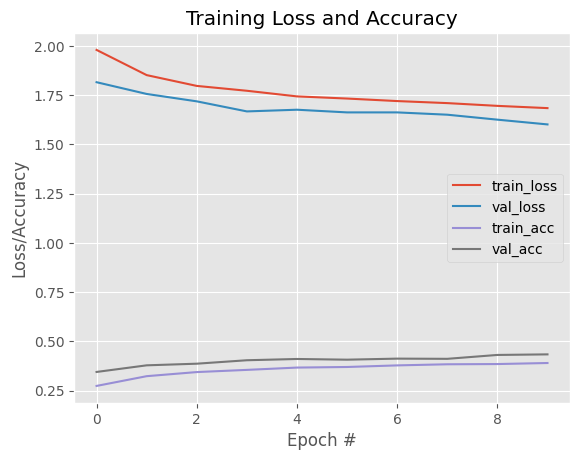

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])